# Weaving data analysis

In [11]:
! python $SUMO_HOME/tools/xml/xml2csv.py -s , ../simulation/weaving/data/induction_loop.xml

In [12]:
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

,interval_begin,interval_end,interval_flow,interval_harmonicMeanSpeed,interval_id,interval_length,interval_nVehContrib,interval_nVehEntered,interval_occupancy,interval_speed,pos_id,flow
0,0.0,300.0,564.0,18.51,downstream_0,5.0,47,47,4.23,18.58,downstream,6768.0
1,0.0,300.0,804.0,18.62,downstream_1,5.0,67,68,6.06,18.69,downstream,9648.0
2,0.0,300.0,888.0,19.15,downstream_2,5.0,74,74,6.44,19.21,downstream,10656.0
3,0.0,300.0,888.0,20.64,downstream_3,5.0,74,74,5.98,20.68,downstream,10656.0
4,0.0,300.0,528.0,18.36,upstream_0,5.0,44,44,3.99,18.42,upstream,6336.0


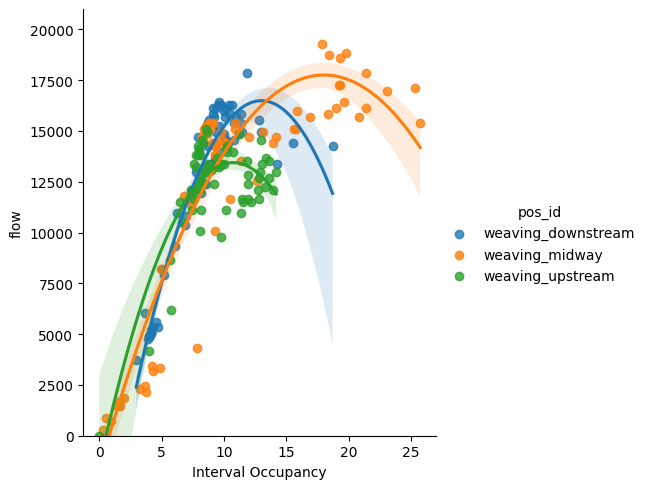

In [14]:
INTERVAL = 300  # in seconds

df = pd.read_csv('../simulation/weaving/data/induction_loop.csv', sep=',')
df['pos_id'] = df['interval_id'].apply(lambda x: '_'.join(x.split('_')[:-1]))
df['flow'] = df['interval_flow'] / INTERVAL * 3600
display(df.head(5))

row_filter = df['pos_id'].isin(['weaving_upstream', 'weaving_midway', 'weaving_downstream'])
g = sns.lmplot(
    data=df[row_filter],
    x='interval_occupancy',
    y='flow',
    hue='pos_id',
    fit_reg=True,
    order=2,
    ci=95
)
g.set_xlabels('Interval Occupancy')
g.set(ylim=(0, 21000))

g.savefig('./img/weaving_100622.png', dpi=600)